### <center> Regression Analysis</center>


    (1) Regression Analysis
    

In [1]:
#!pip install pandas_datareader

In [1]:
# Import required libraries

import numpy as np
import pandas as pd
from pandas_datareader import data as wb

import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

# Uses Seaborn Aesthetics
sns.set()

> ### Regression Analysis

    In statistical modeling, regression analysis is a set of statistical processes for estimating the 
    relationships between a dependent variable and one or more independent variables.
    
    What are the Regression Assumptions?
    
        - Linearity
            
            The assumption is that the true relationship between independent and dependent variables is linear. 
            Examined through a scatter plot,
            
            Solution : 
            When this assumption is not true, we can either run a non-linear regression or try to 
            transform data appropriately so that it follows linearity(e.g. log transformation,exponential)
            
        - No Endogeneity of Regressors (Endogeneity : Omitted Variable Bias/Measurement errors/Simultaneity)
        
        
        
        - Normality and Homoscedasticity
            > Errors are normally distributed
            > Homoscedasticity of errors 
        - No autocorrelation
            Observations are independent of one another
        - No multicollinearity
    
    How do we check regression assumptions? 
    
        We examine the variability left over after we fit the regression line. We simply graph the residuals and 
        look for any unusual patterns.
    
        If a linear model makes sense, the residuals will

        - have a constant variance
        - be approximately normally distributed (with a mean of zero)
        - be independent of one another.
        
        If the residuals fan out as the predicted values increase, then we have what is known as 
        heteroscedasticity.
     
     Common methods 

    - Generalized Least Squares
    - Maximum Likelihood Estimation
    - Bayesian Regression
    - Kernel Regression
    - Gaussian Process Regression
    
    

> ##### Simple Linear Regression
    
    For a population, 
    
$$y = \beta_0 + \beta_1 x_1 + \epsilon$$

$\space\space\space\space\space\space\space\space\space where\space \epsilon \space is \space the\space error\space and \space\beta_0 \space is\space a\space constant$
    
    For a sample, 
    
$$\hat{y} = b_0 + b_1 x_1 $$

$\space\space\space\space\space\space\space\space\space where\space \hat{y} \space is\space the\space Estimated/Predicted\space value\space and\space b_0 \space is\space a\space constant$

In [2]:
tickers = ['COP','^GSPC']
my_df = pd.DataFrame()
for i in tickers:
    my_df[i] = wb.DataReader(i,data_source="yahoo",start="2017-1-1")['Adj Close']    

In [3]:
my_df = (my_df
 .assign(Return = lambda df_ :(np.log(df_['COP']/df_['COP'].shift(1))))
 .assign(Mkt_Return =  lambda df_ :(np.log(df_['^GSPC']/df_['^GSPC'].shift(1))))
)
print(my_df.head())
print("\n")
print(my_df.describe())

                  COP        ^GSPC    Return  Mkt_Return
Date                                                    
2017-01-03  47.556801  2257.830078       NaN         NaN
2017-01-04  47.998451  2270.750000  0.009244    0.005706
2017-01-05  47.857502  2269.000000 -0.002941   -0.000771
2017-01-06  47.678967  2276.979980 -0.003738    0.003511
2017-01-09  46.664116  2268.899902 -0.021515   -0.003555


              COP        ^GSPC      Return  Mkt_Return
count  781.000000   781.000000  780.000000  780.000000
mean    56.892793  2723.345428    0.000252    0.000507
std      9.375584   247.902710    0.017003    0.008069
min     40.620945  2257.830078   -0.061890   -0.041843
25%     47.775909  2510.030029   -0.009272   -0.002257
50%     58.221516  2731.199951    0.000077    0.000706
75%     64.938683  2888.679932    0.010699    0.004614
max     77.816139  3352.090088    0.086648    0.048403


Text(0, 0.5, 'S&P')

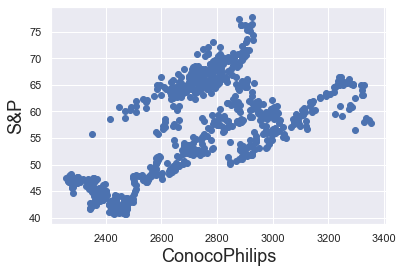

In [4]:
y = my_df['COP']
x1 = my_df['^GSPC']
plt.scatter(x1,y)
plt.xlabel('ConocoPhilips',fontsize=18)
plt.ylabel('S&P',fontsize=18)

In [5]:
x = sm.add_constant(x1)
# The Ordinary Least Squares 
results = sm.OLS(y,x).fit()
results.summary()

/Users/pavitragajanana/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    COP   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     537.9
Date:                Mon, 10 Feb 2020   Prob (F-statistic):           6.97e-91
Time:                        17:08:34   Log-Likelihood:                -2650.6
No. Observations:                 781   AIC:                             5305.
Df Residuals:                     779   BIC:                             5315.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.9312      2.850     -3.134      0.002     -14.526      -3.337
^GSPC          0.0242      0.001     23.192      0.000       0.022       0.026
==============================================================================
Omnibus:                      595.977   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.743
Skew:                           0.415   Prob(JB):                     7.17e-16
Kurtosis:                       1.794   Cond. No.                     3.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/pavitragajanana/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)

Text(0, 0.5, 'S&P')

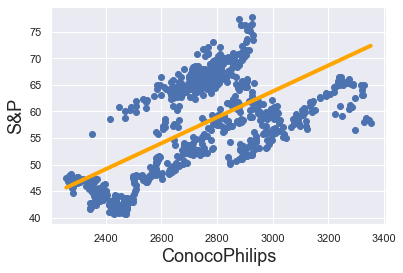

In [6]:
plt.scatter(x1,y)
yhat = 0.0244*x1 - 9.4256
fig = plt.plot(x1,yhat,lw=4,c="orange",label="regression line")
plt.xlabel('ConocoPhilips',fontsize=18)
plt.ylabel('S&P',fontsize=18)

> ##### Multiple Linear Regression
    
    
     For a population, 
    
$$\gamma = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... +  \beta_k x_k +\epsilon$$

$\space\space\space\space\space\space\space\space\space where\space \epsilon \space is \space the\space error\space and \space\beta_0 \space is\space a\space constant$
    
    For a sample, 
    
$$\hat{y} = b_0 + b_1 x_1 + b_2 x_2 + ... + b_k x_k $$

$\space\space\space\space\space\space\space\space\space where\space \hat{y} \space is\space the\space Estimated/Predicted\space value\space and\space b_0 \space is\space a\space constant$


    (3) Building , Interpreting and Comparing different models

    Remember :
    
    1. Correlation vs Regression
       Correlation does not imply causation. It measures degree   of relationship between 2 variables. It is symmetrical and is represented by a single point.
      
      On the other hand, regression measures how the changes in  one variable affects the other. It implies causation and is  represented by a best fitting line.
       
     2. Minimum SSE 
     Although adding more variables to your model would explain for the variability but it would also drive up the total variability 
     
     3. R-Squared
     4. Adjusted R-Squared
     
    
    Remember
    
    Goodness of Fit : R2
    